# Jacobian


Some claassic libraries are used to work with 3D.


In [1]:
# %matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We define a function with a maxima
$$ f(x,y) = e^{-(x^{2} + y^{2})} $$

In [2]:
f = lambda x,y: np.exp(-(x**2 +y**2))

# derivated functions 
f_prime_x = lambda x,y: -2 * x * np.exp(-(x**2 +y**2))
f_prime_y = lambda x,y: -2 * y * np.exp(-(x**2 +y**2))

# jacobian
jacobian = lambda xyz: [f_prime_x(xyz[0],xyz[1]), f_prime_y(xyz[0],xyz[1]),xyz[2]]

jacobian((-1, 1,0))

[0.2706705664732254, -0.2706705664732254, 0]

## Meshgrid explanation
The meshgrid function is useful in Data Science.

### Basics
Lets have a five points from a linear function. 

In [3]:
# xs coordinates
x = np.linspace(-2, 2, 5)

# ys coordinates
y = np.linspace(-2, 2, 5)

Drawing that function produce the following result. 

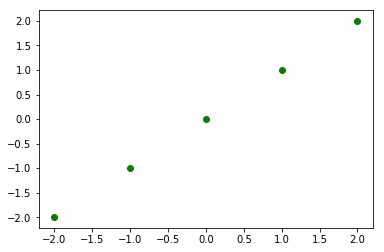

In [4]:

%matplotlib inline
plt.scatter(x, y, color='green', alpha=1.0)
plt.show()

x:  [-2. -1.  0.  1.  2.]
y:  [-2. -1.  0.  1.  2.]
X:  [[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
Y:  [[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]


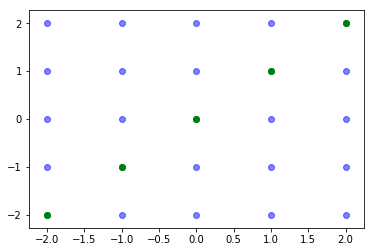

In [5]:
# test 
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)

print('x: ', x)
print('y: ', y)
print('X: ', X)
print('Y: ', Y)


plt.scatter(X, Y, color='blue', alpha=0.5)
plt.scatter(x, y, color='green', alpha=1.0)
plt.show()

In [6]:
# values
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Z
Z = f(X, Y)

# Points    
xs = np.linspace(-2, 2, 6)
ys = np.linspace(-2, 2, 6)

XS, YS = np.meshgrid(xs, ys)

points = np.array([XS,YS])

# z calculation for the choosen points
points = np.append(points, f(points[0], points[1]))

# number of dimensions (X, Y, Z) = 3
dimensions_count = 3

# number of points
points_count = int(points.size / 3)

# because append flatten the array. It needs to be reshaped
points = points.reshape(dimensions_count, points_count)

# build a list of (x,y) points 
xyzs = list(zip(points[0], points[1], points[2]))

# calculate the jacobian using list comprehension
jacobians = [jacobian(xyz) for xyz in xyzs]
jacobians = np.array(jacobians).transpose() 


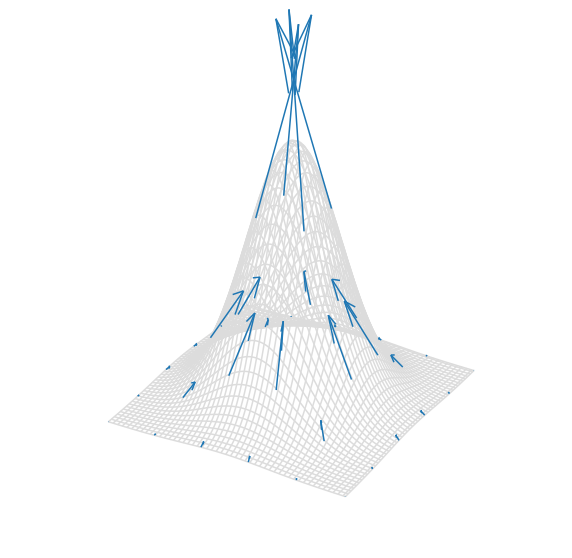

In [7]:
# plotting the results
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.grid(False)

plt.axis('off')
# drawing the function
ax.plot_wireframe(X, Y, Z, color='gainsboro')

# drawing the Jacobians
ax.quiver(points[0], points[1],points[2], jacobians[0], jacobians[1], jacobians[2])

plt.show(block=True)
plt.interactive(False)